In [57]:
from qiskit import QuantumRegister,ClassicalRegister,QuantumCircuit, execute
from qiskit import Aer, IBMQ
from qiskit import tools
from qiskit.test import mock 
import qiskit
from qiskit.quantum_info.operators import Operator
from qiskit.compiler import transpile
from qiskit.visualization import plot_gate_map
from qiskit.providers.aer import noise
import scipy.linalg as linalg
import numpy as np
from scipy.linalg import expm
from numpy.linalg import svd
import csv as csv
from scipy.optimize import minimize
import numpy as np
import pandas as pd
import json
from scipy.linalg import expm
from numpy import pi as pi
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
import datetime 
import argparse
import random
from random import randint
from importlib import reload
import sys
# import gvar as gv
# import lsqfit
import pandas as pd
import json
from qiskit.quantum_info.operators.channel import Choi, Kraus
# IBMQ.load_account()

Create U and U-dagger gates with randomized Pauli twirling:

In [58]:
def pauli_ugate(qc):
    
    #U GATE
    qc.sxdg(1)
    qc.z(0)
    qc.s(1)
    
    #Pauli gate on 0 bc
    n = randint(0,3)
    if n == 0:
        qc.x(0)
    elif n == 1:
        qc.y(0)
    elif n == 2:
        qc.z(0)
    elif n == 3:
        qc.id(0)
    
    #Pauli gate on 1 bt
    m = randint(0,3)
    if m ==0:
        qc.x(1)
    elif m == 1:
        qc.y(1)
    elif m == 2:
        qc.z(1)
    elif m == 3:
        qc.id(1)
    
    #Pauli gate squared on 2
    o = randint(0,3)
    if o == 0:
        qc.x(2)
        #qc.x(2)
    if o == 1:
        qc.y(2)
        #qc.y(2)
    if o == 2:
        qc.z(2)
        #qc.z(2)
    if o == 3:
        qc.id(2)
        #qc.id(2)
    
    #CNOT
    qc.barrier()
    qc.cx(0,1)
    qc.barrier()
    
    #Pauli complementary gate on 0, 1 (ac, at) 
    if n == 0 and m == 0:    #if bc = x, bt = x, ac = x, at = id
        qc.x(0)
        qc.id(1)
        
    if n == 0 and m == 1:      #if bc = x, bt = y, ac = y, at = z  
        qc.y(0)
        qc.z(1)
        
    if n == 0 and m == 2:     #if bc = x, bt = z, ac = y, at = y
        qc.y(0)
        qc.y(1)
        
    if n == 0 and m == 3:     #if bc = x, bt = id, ac = x, at = x
        qc.x(0)
        qc.x(1)
        
    if n == 1 and m == 0:     #if bc = y, bt = x, ac = y, at = id
        qc.y(0)
        qc.id(1)
        
    if n == 1 and m == 1:     #if bc = y, bt = y, ac = x, at = z
        qc.x(0)
        qc.z(1)
        
    if n == 1 and m == 2:     #if bc = y, bt = z, ac = x, at = y
        qc.x(0)
        qc.y(1)
        
    if n == 1 and m == 3:     #if bc = y, bt = id, ac = y, at = x
        qc.y(0)
        qc.x(1)
        
    if n == 2 and m == 0:     #if bc = z, bt = x, ac = z, at = x
        qc.z(0)
        qc.x(1)
        
    if n == 2 and m == 1:     #if bc = z, bt = y, ac = id, at = y
        qc.id(0)
        qc.y(1)
        
    if n == 2 and m == 2:     #if bc = z, bt = z, ac = id, at = z
        qc.id(0)
        qc.z(1)
        
    if n == 2 and m == 3:     #if bc = z, bt = id, ac = z, at = id
        qc.z(0)
        qc.id(1)
        
    if n == 3 and m == 0:     #if bc = id, bt = x, ac = id, at = x
        qc.id(0)
        qc.x(1)
        
    if n == 3 and m == 1:     #if bc = id, bt = y, ac = z, at = y
        qc.z(0)
        qc.y(1)
        
    if n == 3 and m == 2:     #if bc = id, bt = z, ac = z, at = z
        qc.z(0)
        qc.z(1)
        
    if n == 3 and m == 3:     #if bc = id, bt = id, ac = id, at = id
        qc.id(0)
        qc.id(1)      
            
    
    #Pauli gate squared on 2
    #k = randint(0,3)
    if o == 0:
        qc.x(2)
        #qc.x(2)
    if o == 1:
        qc.y(2)
        #qc.y(2)
    if o == 2:
        qc.z(2)
        #qc.z(2)
    if o == 3:
        qc.id(2)
        #qc.id(2)
   

    #Sx gate  
    qc.sx(0)
    
        
    #Pauli gate on 0 bc
    w = randint(0,3)
    if w == 0:
        qc.x(0)
    elif w == 1:
        qc.y(0)
    elif w == 2:
        qc.z(0)
    elif w == 3:
        qc.id(0)
    
    #Pauli gate on 2 bt
    x = randint(0,3)
    if x ==0:
        qc.x(2)
    elif x == 1:
        qc.y(2)
    elif x == 2:
        qc.z(2)
    elif x == 3:
        qc.id(2)
        
    #Pauli gate squared on 1
    b = randint(0,3)
    if b == 0:
        qc.x(1)
        #qc.x(1)
    if b == 1:
        qc.y(1)
        #qc.y(1)
    if b == 2:
        qc.z(1)
        #qc.z(1)
    if b == 3:
        qc.id(1)
        #qc.id(1)
    
    #CNOT
    qc.barrier()
    qc.cx(0,2)
    qc.barrier()
    
            
 #Pauli complementary gate on 0, 2 (ac, at) 
    if w == 0 and x == 0:    #if bc = x, bt = x, ac = x, at = id
        qc.x(0)
        qc.id(2)
        
    if w == 0 and x == 1:      #if bc = x, bt = y, ac = y, at = z  
        qc.y(0)
        qc.z(2)
        
    if w == 0 and x == 2:     #if bc = x, bt = z, ac = y, at = y
        qc.y(0)
        qc.y(2)
        
    if w == 0 and x == 3:     #if bc = x, bt = id, ac = x, at = x
        qc.x(0)
        qc.x(2)
        
    if w == 1 and x == 0:     #if bc = y, bt = x, ac = y, at = id
        qc.y(0)
        qc.id(2)
        
    if w == 1 and x == 1:     #if bc = y, bt = y, ac = x, at = z
        qc.x(0)
        qc.z(2)
        
    if w == 1 and x == 2:     #if bc = y, bt = z, ac = x, at = y
        qc.x(0)
        qc.y(2)
        
    if w == 1 and x == 3:     #if bc = y, bt = id, ac = y, at = x
        qc.y(0)
        qc.x(2)
        
    if w == 2 and x == 0:     #if bc = z, bt = x, ac = z, at = x
        qc.z(0)
        qc.x(2)
        
    if w == 2 and x == 1:     #if bc = z, bt = y, ac = id, at = y
        qc.id(0)
        qc.y(2)
        
    if w == 2 and x == 2:     #if bc = z, bt = z, ac = id, at = z
        qc.id(0)
        qc.z(2)
        
    if w == 2 and x == 3:     #if bc = z, bt = id, ac = z, at = id
        qc.z(0)
        qc.id(2)
        
    if w == 3 and x == 0:     #if bc = id, bt = x, ac = id, at = x
        qc.id(0)
        qc.x(2)
        
    if w == 3 and x == 1:     #if bc = id, bt = y, ac = z, at = y
        qc.z(0)
        qc.y(2)
        
    if w == 3 and x == 2:     #if bc = id, bt = z, ac = z, at = z
        qc.z(0)
        qc.z(2)
        
    if w == 3 and x == 3:     #if bc = id, bt = id, ac = id, at = id
        qc.id(0)
        qc.id(2)      
             
            
    #Pauli gate squared on 1
    #d = randint(0,3)
    if b == 0:
        qc.x(1)
        #qc.x(1)
    if b == 1:
        qc.y(1)
        #qc.y(1)
    if b == 2:
        qc.z(1)
        #qc.z(1)
    if b == 3:
        qc.id(1)
        #qc.id(1)
        
    #END OF FIRST U GATE
    
    return qc

In [59]:
def pauli_udagger(qc):
    
    #U DAGGER GATE
    
    #Pauli gate on 0 bc
    w = randint(0,3)
    if w == 0:
        qc.x(0)
    elif w == 1:
        qc.y(0)
    elif w == 2:
        qc.z(0)
    elif w == 3:
        qc.id(0)
        
    #Pauli gate on 2 bt
    x = randint(0,3)
    if x == 0:
        qc.x(2)
    elif x == 1:
        qc.y(2)
    elif x == 2:
        qc.z(2)
    elif x == 3:
        qc.id(2)
        
    #Pauli gate squared on 1
    b = randint(0,3)
    if b == 0:
        qc.x(1)
        #qc.x(1)
    if b == 1:
        qc.y(1)
        #qc.y(1)
    if b == 2:
        qc.z(1)
        #qc.z(1)
    if b == 3:
        qc.id(1)
        #qc.id(1)
    
    #CNOT
    qc.barrier()
    qc.cx(0,2)
    qc.barrier()
    
    #Pauli complementary gate on 0, 2 (ac, at) 
    if w == 0 and x == 0:    #if bc = x, bt = x, ac = x, at = id
        qc.x(0)
        qc.id(2)
        
    if w == 0 and x == 1:      #if bc = x, bt = y, ac = y, at = z  
        qc.y(0)
        qc.z(2)
        
    if w == 0 and x == 2:     #if bc = x, bt = z, ac = y, at = y
        qc.y(0)
        qc.y(2)
        
    if w == 0 and x == 3:     #if bc = x, bt = id, ac = x, at = x
        qc.x(0)
        qc.x(2)
        
    if w == 1 and x == 0:     #if bc = y, bt = x, ac = y, at = id
        qc.y(0)
        qc.id(2)
        
    if w == 1 and x == 1:     #if bc = y, bt = y, ac = x, at = z
        qc.x(0)
        qc.z(2)
        
    if w == 1 and x == 2:     #if bc = y, bt = z, ac = x, at = y
        qc.x(0)
        qc.y(2)
        
    if w == 1 and x == 3:     #if bc = y, bt = id, ac = y, at = x
        qc.y(0)
        qc.x(2)
        
    if w == 2 and x == 0:     #if bc = z, bt = x, ac = z, at = x
        qc.z(0)
        qc.x(2)
        
    if w == 2 and x == 1:     #if bc = z, bt = y, ac = id, at = y
        qc.id(0)
        qc.y(2)
        
    if w == 2 and x == 2:     #if bc = z, bt = z, ac = id, at = z
        qc.id(0)
        qc.z(2)
        
    if w == 2 and x == 3:     #if bc = z, bt = id, ac = z, at = id
        qc.z(0)
        qc.id(2)
        
    if w == 3 and x == 0:     #if bc = id, bt = x, ac = id, at = x
        qc.id(0)
        qc.x(2)
        
    if w == 3 and x == 1:     #if bc = id, bt = y, ac = z, at = y
        qc.z(0)
        qc.y(2)
        
    if w == 3 and x == 2:     #if bc = id, bt = z, ac = z, at = z
        qc.z(0)
        qc.z(2)
        
    if w == 3 and x == 3:     #if bc = id, bt = id, ac = id, at = id
        qc.id(0)
        qc.id(2)      
                    
            
    #Pauli gate squared on 1
    if b == 0:
        qc.x(1)
    if b == 1:
        qc.y(1)
    if b == 2:
        qc.z(1)
    if b == 3:
        qc.id(1)
        
    #Sx gate
    qc.sxdg(0)
    
    #Pauli gate on 0 bc
    n = randint(0,3)
    if n == 0:
        qc.x(0)
    elif n == 1:
        qc.y(0)
    elif n == 2:
        qc.z(0)
    elif n == 3:
        qc.id(0)
    
    #Pauli gate on 1 bt
    m = randint(0,3)
    if m ==0:
        qc.x(1)
    elif m == 1:
        qc.y(1)
    elif m == 2:
        qc.z(1)
    elif m == 3:
        qc.id(1)
    
    #Pauli gate squared on 2
    o = randint(0,3)
    if o == 0:
        qc.x(2)
    if o == 1:
        qc.y(2)
    if o == 2:
        qc.z(2)
    if o == 3:
        qc.id(2)
        
    #CNOT
    qc.barrier()
    qc.cx(0,1)
    qc.barrier()
    
    #Pauli complementary gate on 0, 1 (ac, at) 
    if n == 0 and m == 0:    #if bc = x, bt = x, ac = x, at = id
        qc.x(0)
        qc.id(1)
        
    if n == 0 and m == 1:      #if bc = x, bt = y, ac = y, at = z  
        qc.y(0)
        qc.z(1)
        
    if n == 0 and m == 2:     #if bc = x, bt = z, ac = y, at = y
        qc.y(0)
        qc.y(1)
        
    if n == 0 and m == 3:     #if bc = x, bt = id, ac = x, at = x
        qc.x(0)
        qc.x(1)
        
    if n == 1 and m == 0:     #if bc = y, bt = x, ac = y, at = id
        qc.y(0)
        qc.id(1)
        
    if n == 1 and m == 1:     #if bc = y, bt = y, ac = x, at = z
        qc.x(0)
        qc.z(1)
        
    if n == 1 and m == 2:     #if bc = y, bt = z, ac = x, at = y
        qc.x(0)
        qc.y(1)
        
    if n == 1 and m == 3:     #if bc = y, bt = id, ac = y, at = x
        qc.y(0)
        qc.x(1)
        
    if n == 2 and m == 0:     #if bc = z, bt = x, ac = z, at = x
        qc.z(0)
        qc.x(1)
        
    if n == 2 and m == 1:     #if bc = z, bt = y, ac = id, at = y
        qc.id(0)
        qc.y(1)
        
    if n == 2 and m == 2:     #if bc = z, bt = z, ac = id, at = z
        qc.id(0)
        qc.z(1)
        
    if n == 2 and m == 3:     #if bc = z, bt = id, ac = z, at = id
        qc.z(0)
        qc.id(1)
        
    if n == 3 and m == 0:     #if bc = id, bt = x, ac = id, at = x
        qc.id(0)
        qc.x(1)
        
    if n == 3 and m == 1:     #if bc = id, bt = y, ac = z, at = y
        qc.z(0)
        qc.y(1)
        
    if n == 3 and m == 2:     #if bc = id, bt = z, ac = z, at = z
        qc.z(0)
        qc.z(1)
        
    if n == 3 and m == 3:     #if bc = id, bt = id, ac = id, at = id
        qc.id(0)
        qc.id(1)      
    
    #Pauli gate squared on 2
    if o == 0:
        qc.x(2)
    if o == 1:
        qc.y(2)
    if o == 2:
        qc.z(2)
    if o == 3:
        qc.id(2)
        
        
    qc.z(0)
    qc.sdg(1)
    qc.sx(1)
    
    #END OF U DAGGER GATE
    
    return qc
    

Build and test twirled and non-twirled circuits, and create trotterization function:

In [60]:
def exact_circuit(qc, dt, eta):

    #Ugate
    qc.sxdg(1)
    qc.z(0)
    qc.s(1)
    qc.barrier()
    qc.cx(0,1)
    qc.barrier()
    qc.sx(0)
    qc.barrier()
    qc.cx(0,2)
    qc.barrier()

    #Rx
    qc.rx(-(dt*eta)/4,0)

    #Ry
    qc.ry(-(dt*eta)/4,2)

    #Udagger
    qc.barrier()
    qc.cx(0,2)
    qc.barrier()
    qc.sxdg(0)
    qc.barrier()
    qc.cx(0,1)
    qc.barrier()
    qc.z(0)
    qc.sdg(1)
    qc.sx(1)
    
    return qc
    

In [61]:
def twirled_circuit(qc, dt, eta):

    qc = pauli_ugate(qc)

    qc.barrier()

    #Rx
    qc.rx(-(dt*eta)/4,0)

    #Ry
    qc.ry(-(dt*eta)/4,2)

    qc.barrier()

    qc = pauli_udagger(qc)

    
    return qc

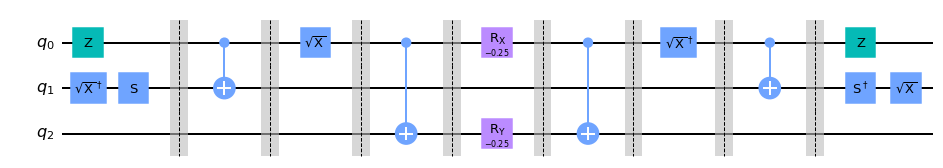

In [62]:
qctest = QuantumCircuit(3)
test = exact_circuit(qctest,1,1)
test.draw()

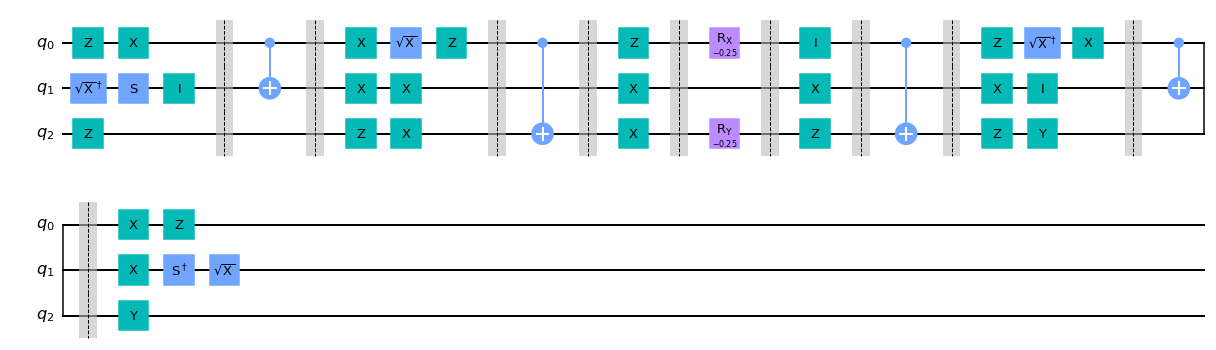

In [63]:
qctestt = QuantumCircuit(3)
testt = twirled_circuit(qctestt,1,1)
testt.draw()

In [64]:
def trotter_twirled(qc, ht, dt, nsteps):
    
    qc.h(1)
    qc.x(0)
    
    for i in range(nsteps):
        
        qc = twirled_circuit(qc, dt, ht)
        qc.barrier()
        
    qc.save_density_matrix()
    return qc


def trotter_exact(qc, ht, dt, nsteps):
    
    qc.h(1)
    qc.x(0)
    
    for i in range(nsteps):
        
        qc = exact_circuit(qc, dt, ht)
        qc.barrier()
        
    qc.save_density_matrix()
    return qc
    

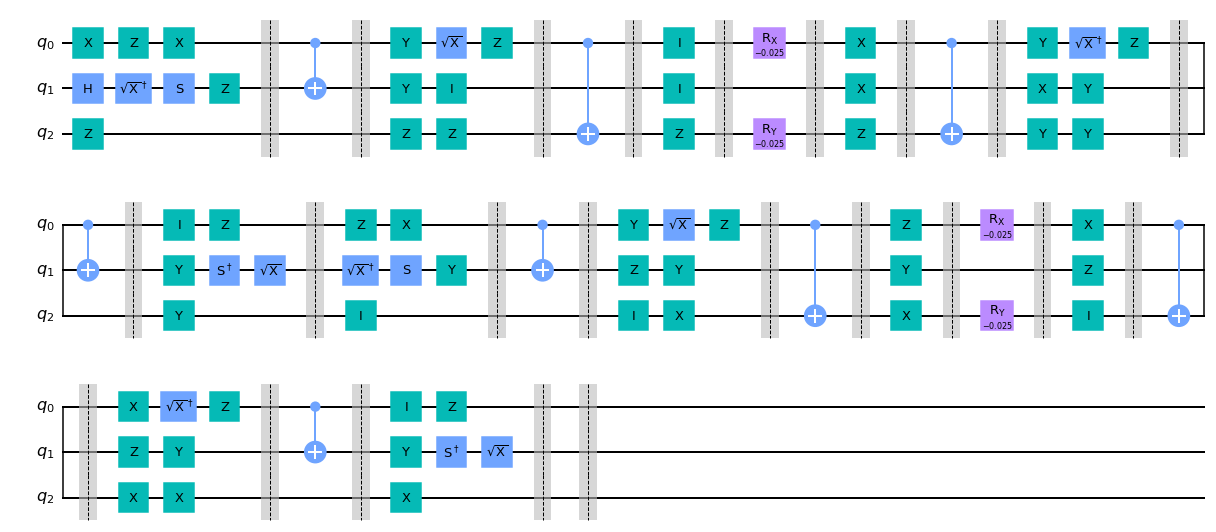

In [65]:
testqc = QuantumCircuit(3)
testht = 1
testdt = 0.1
testnsteps = 2

ex = trotter_twirled(testqc, testht, testdt, testnsteps)
ex.draw()

Run Aer Simulator with noise model, using random xi parameter for each Trotter step and measuring Z0:

In [67]:
def run_with_noise_model(circuits, noise_model):
    backend=Aer.get_backend('aer_simulator_density_matrix')
    job = execute(circuits, backend=backend, optimization_level=0, noise_model=noise_model,
              basis_gates=['save_density_matrix', 'cx', 'h', 'rz', 'x', 'y', 'z', 'u', 'id'])
    #job_monitor(job, interval=1)
    return job

def run_without_noise_model(circuits):
    backend=Aer.get_backend('aer_simulator_density_matrix')
    job = execute(circuits, backend=backend, optimization_level=0,
              basis_gates=['save_density_matrix', 'cx', 'h', 'rz', 'x', 'y', 'z', 'u', 'id'])
    #job_monitor(job, interval=1)
    return job

In [68]:
#functions to simulate time evolution for twirled, untwirled (noisy), untwirled (exact)
#takes Z from each Trotter step - should be n_dt of them - n_qc amount of times
#takes average of the n_qc arrays to get average Z for each Trotter step

def random_xi(dt, n_dt, n_qc, eta):
    
    Z_avg_exact = []
    Z_avg_noise = []
    Z_avg_twirl = []
    Ts = []
    
    for i in range(n_dt):
        
        Ts.append(i)
        
        trot_twirl = []
        trot_exact = []

        for j in range(n_qc):

            trot_twirl.append(trotter_twirled(QuantumCircuit(3), eta, dt, i+1))
            trot_exact.append(trotter_exact(QuantumCircuit(3), eta, dt, i+1))
            #lists of n_qc amount of the same trotter step
            
        m = randint(1,10)
        xi = m*0.02
        
        backend = Aer.get_backend('aer_simulator_density_matrix')
        c, s = np.cos(np.pi / 4), -1.0j * np.sin(np.pi / 4)
        x_op = np.array([[0, 1], [1, 0]])
        z_op = np.array([[1, 0], [0, -1]])
        op1 = expm(-1.0j * np.pi / 4 * (np.kron(x_op, z_op) + xi * np.kron(z_op, np.identity(2))))
        op2 = (c * np.identity(4) - s * np.kron(np.identity(2), z_op))
        op3 = (c * np.identity(4) - s * np.kron(x_op, np.identity(2)))
        cx = np.array([[1, 0, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0], [0, 1, 0, 0]])
        op1 @ op2 @ op3 @ cx
        noise_model = noise.NoiseModel()
        noise_model.add_all_qubit_quantum_error(noise.coherent_unitary_error(op1 @ op2 @ op3 @ cx), 'cx')


        job_exact = run_without_noise_model(trot_exact)  #job will have n_qc results
        job_noise = run_with_noise_model(trot_exact, noise_model)
        job_twirled = run_with_noise_model(trot_twirl, noise_model)
        
        print(xi)
        
        Z_exact = []
        Z_noise = []
        Z_twirl = []
        Z_err = []

        for k in range(n_qc):
            density_exact = job_exact.result().data(k)['density_matrix']
            z_exact = np.trace(density_exact @ np.diag([1,1,1,1,-1,-1,-1,-1])) #Z for q0
            Z_exact.append(z_exact)

            density_noise = job_noise.result().data(k)['density_matrix']
            z_noise = np.trace(density_noise @ np.diag([1,1,1,1,-1,-1,-1,-1]))
            Z_noise.append(z_noise)
            
            density_twirled = job_twirled.result().data(k)['density_matrix']
            z_twirl = np.trace(density_twirled @ np.diag([1,1,1,1,-1,-1,-1,-1]))
            Z_twirl.append(z_twirl)


        Z_avg_exact.append(np.average(Z_exact))
        Z_avg_noise.append(np.average(Z_noise))
        Z_avg_twirl.append(np.average(Z_twirl))
    
        Zerr_twirl = np.std(Z_twirl) #find STD
        Zerr_twirl *= (1/np.sqrt(n_qc))
        Z_err.append(Zerr_twirl)


    return Z_avg_exact, Z_avg_noise, Z_avg_twirl, Ts, Z_err
    
    
    


In [50]:
#set parameters
dt = 0.1 #time step
n_dt = 20 #number of time/trotter steps
eta = 10 #frequency parameter

n_qc = 1 #number of circuits per trotter step
data1 = random_xi(dt, n_dt, n_qc, eta)   
#data list contains exact[0], noise[1], twirl[2], time[3], twirl err[4] 

n_qc = 2
data2 = random_xi(dt, n_dt, n_qc, eta)

n_qc = 5
data5 = random_xi(dt, n_dt, n_qc, eta)

n_qc = 10
data10 = random_xi(dt, n_dt, n_qc, eta)

n_qc = 20
data20 = random_xi(dt, n_dt, n_qc, eta)



0.04
0.2
0.2
0.12
0.18
0.12
0.16
0.16
0.16
0.08
0.1
0.14
0.12
0.08
0.16
0.14
0.06
0.12
0.18
0.08
0.12
0.08
0.14
0.02
0.16
0.16
0.2
0.02
0.08
0.2
0.16
0.06
0.04
0.12
0.1
0.04
0.16
0.1
0.08
0.14
0.02
0.14
0.18
0.04
0.08
0.18
0.1
0.2
0.1
0.02
0.1
0.12
0.08
0.14
0.18
0.06
0.04
0.12
0.04
0.02
0.06
0.1
0.08
0.16
0.18
0.16
0.06
0.08
0.18
0.02
0.08
0.08
0.08
0.2
0.04
0.18
0.06
0.1
0.18
0.08
0.1
0.18
0.2
0.04
0.2
0.1
0.1
0.1
0.1
0.2
0.04
0.2
0.1
0.16
0.12
0.14
0.14
0.02
0.14
0.16


In [ ]:
import pickle

#save Zs for comparison
f = open('random xi1.pkl', 'wb')
pickle.dump(data20, f)
f.close()

/opt/conda/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/opt/conda/lib/python3.8/site-packages/numpy/ma/core.py:3377: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval
/opt/conda/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/opt/conda/lib/python3.8/site-packages/numpy/ma/core.py:3377: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval
/opt/conda/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/opt/conda/lib/python3.8/site-packages/numpy/ma/core.py:3377: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[in

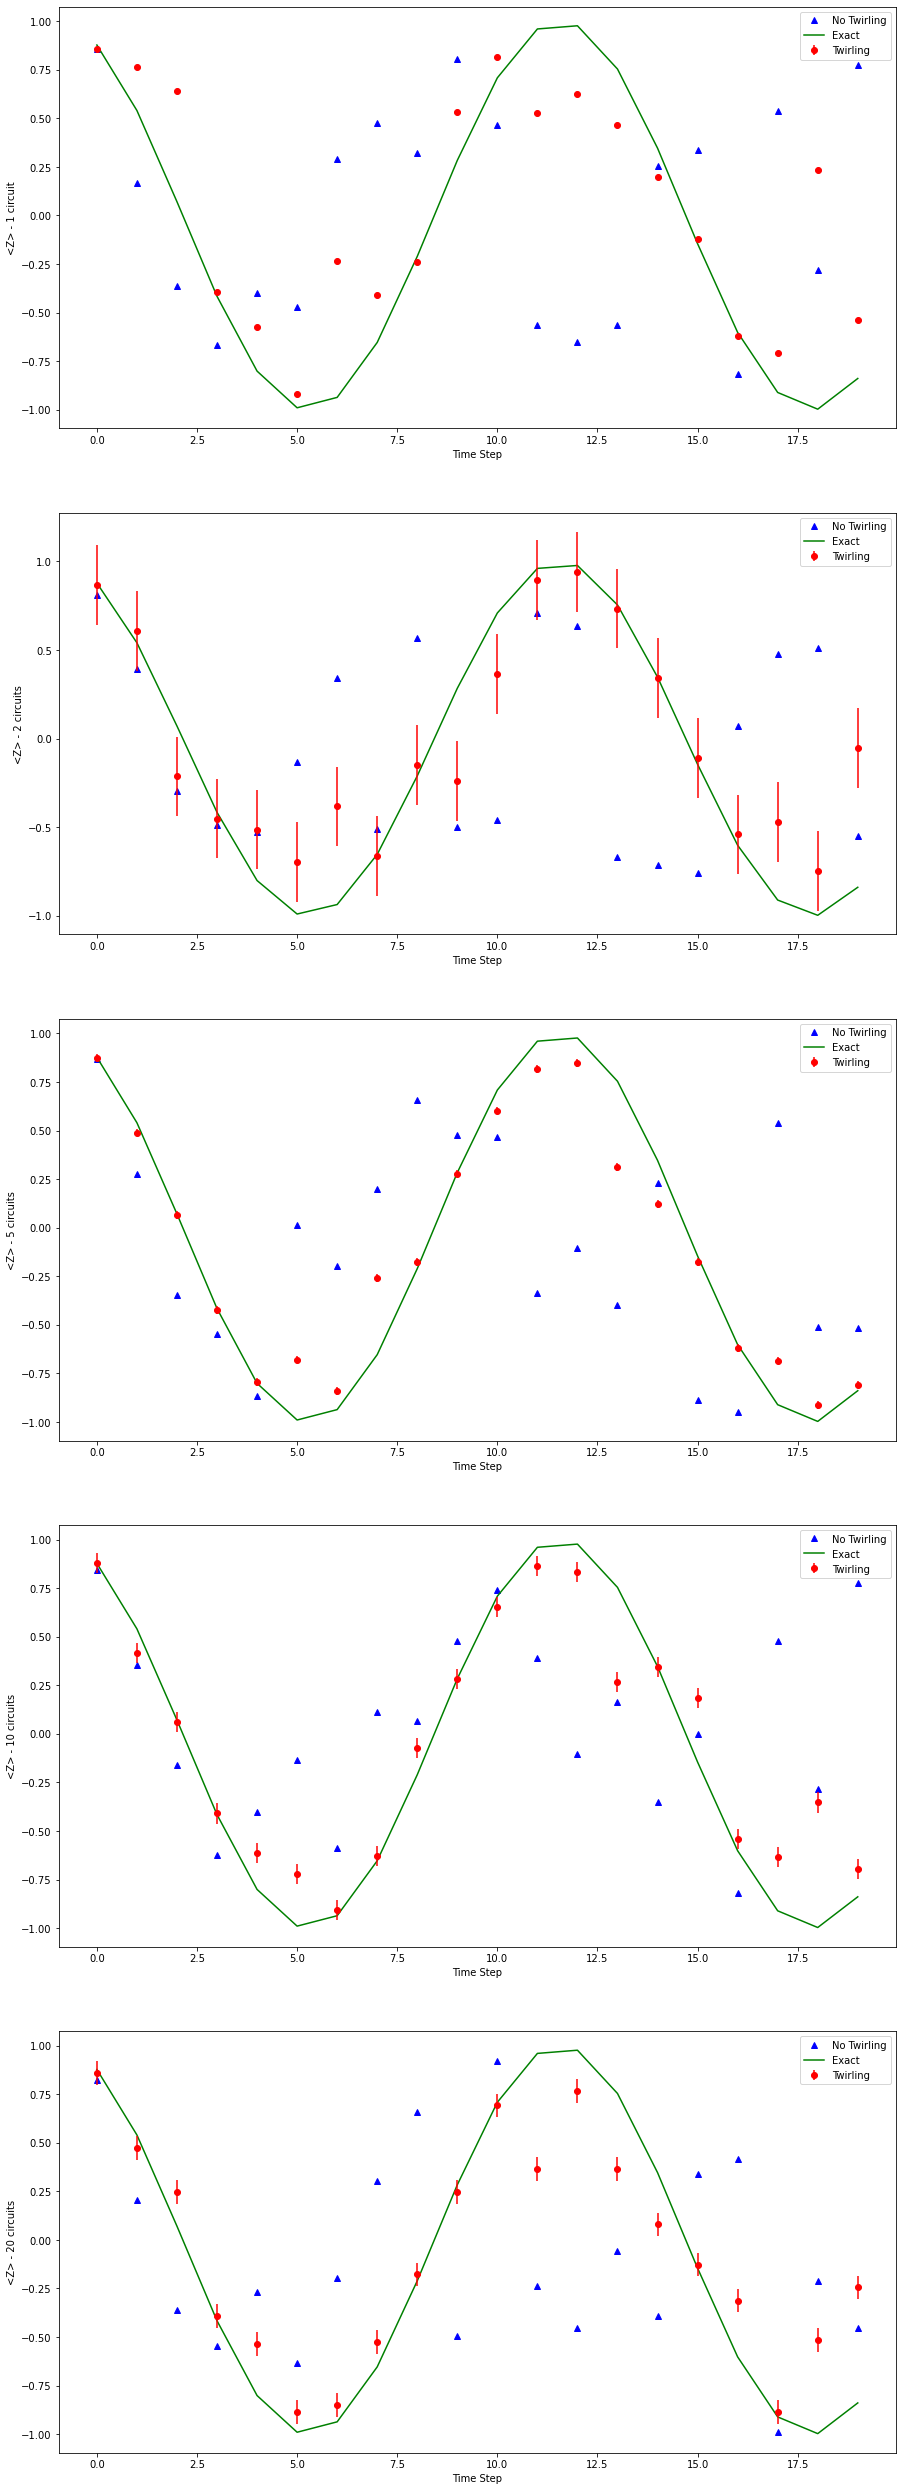

In [54]:
plt.rcParams["figure.figsize"] = [15, 45]
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1)

ax1.plot(data1[3], data1[1], 'b^', data1[3], data1[0], 'g-')
ax1.errorbar(data1[3], data1[2], fmt='ro', yerr=data1[4]) 
ax1.set_xlabel('Time Step')
ax1.set_ylabel('<Z> - 1 circuit')
ax1.legend(['No Twirling', 'Exact', 'Twirling'], loc='best')

ax2.plot(data2[3], data2[1], 'b^', data2[3], data2[0], 'g-')
ax2.errorbar(data2[3], data2[2], fmt='ro', yerr=data2[4])
ax2.set_xlabel('Time Step')
ax2.set_ylabel('<Z> - 2 circuits')
ax2.legend(['No Twirling', 'Exact', 'Twirling'], loc='best')

ax3.plot(data5[3], data5[1], 'b^', data5[3], data5[0], 'g-')
ax3.errorbar(data5[3], data5[2], fmt='ro', yerr=data5[4])
ax3.set_xlabel('Time Step')
ax3.set_ylabel('<Z> - 5 circuits')
ax3.legend(['No Twirling', 'Exact', 'Twirling'], loc='best')

ax4.plot(data10[3], data10[1], 'b^', data10[3], data10[0], 'g-')
ax4.errorbar(data10[3], data10[2], fmt='ro', yerr=data10[4])
ax4.set_xlabel('Time Step')
ax4.set_ylabel('<Z> - 10 circuits')
ax4.legend(['No Twirling', 'Exact', 'Twirling'], loc='best')

ax5.plot(data20[3], data20[1], 'b^', data20[3], data20[0], 'g-')
ax5.errorbar(data20[3], data20[2], fmt='ro', yerr=data20[4])
ax5.set_xlabel('Time Step')
ax5.set_ylabel('<Z> - 20 circuits')
ax5.legend(['No Twirling', 'Exact', 'Twirling'], loc='best')

#plt.savefig('(0.02-0.2)random xi trotter steps 6.png')
plt.show()

Compare several runs of each Trotter step for 20 circuits per step:

In [ ]:
data_20_overlay = []
data_20_overlay_err = []

In [ ]:
#add files to list to compare error overlap/accuracy at each trotter step

Z_20 = pickle.load(open('random xi1.pkl', 'rb'))
data_20_overlay.append(Z_20[2]) #adds twirled Z list to list
data_20_overlay_err.append(Z_20[4]) #adds twirled Z error list to list

/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/ma/core.py:3375: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/ma/core.py:3375: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/ma/core.py:3375: ComplexWarning: Casting complex values to real

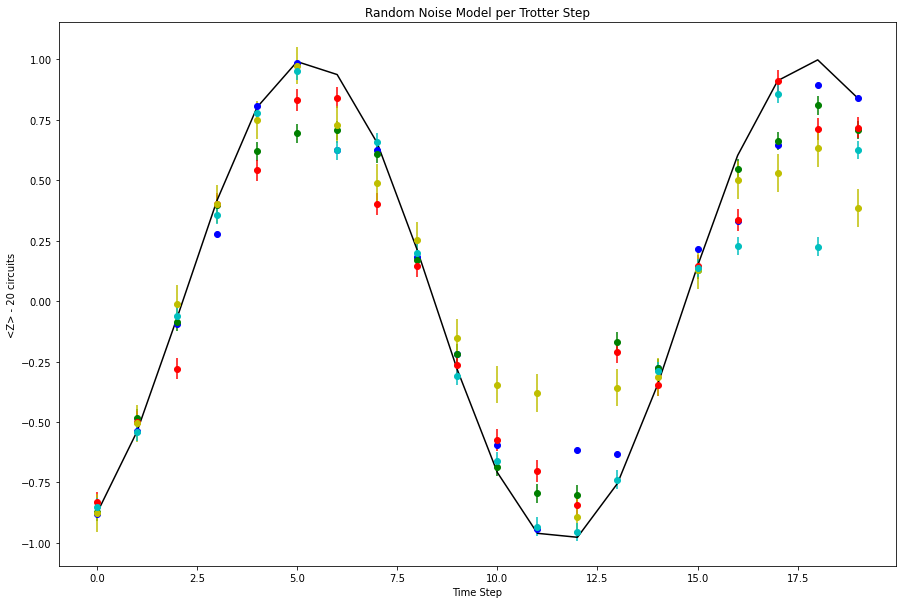

In [49]:
Time = []
for i in range(20):
    Time.append(i)  

plt.rcParams["figure.figsize"] = [15, 10]
plt.errorbar(Time, data_20_overlay[0], fmt='bo', yerr=data_20_overlay_err[0])
plt.errorbar(Time, data_20_overlay[1], fmt='go', yerr=data_20_overlay_err[1])
plt.errorbar(Time, data_20_overlay[2], fmt='ro', yerr=data_20_overlay_err[2])
plt.errorbar(Time, data_20_overlay[3], fmt='yo', yerr=data_20_overlay_err[3])
plt.errorbar(Time, data_20_overlay[4], fmt='co', yerr=data_20_overlay_err[4])
plt.plot(Time, data20[0], 'k-', label='Exact')
plt.xlabel('Time Step')
plt.ylabel('<Z> - 20 circuits')
plt.title('Random Noise Model per Trotter Step')
plt.savefig('20 circuit overlay err (0.02-0.2.png')
plt.show()

Average noise model data at 20 circuits per Trotter step and compare to expected:

In [50]:
list1 = data_20_overlay[0]
list2 = data_20_overlay[1]
list3 = data_20_overlay[2]
list4 = data_20_overlay[3]
list5 = data_20_overlay[4]


step_avg = []

for i in range(20):
    average_list = []
    average_list.append(list1[i])
    average_list.append(list2[i])
    average_list.append(list3[i])
    average_list.append(list4[i])
    average_list.append(list5[i])
    
    zavg = np.average(average_list)
    
    step_avg.append(zavg)
       
    

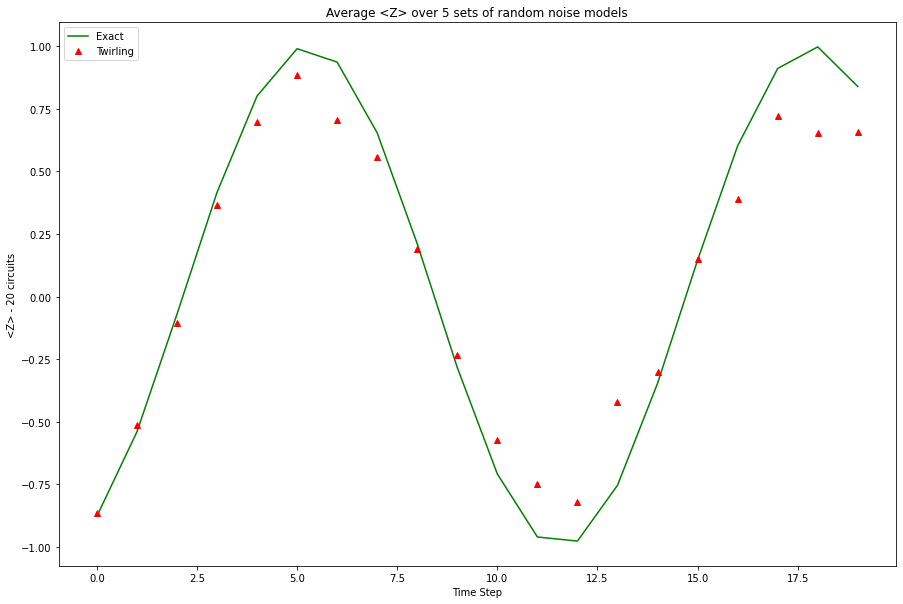

In [53]:
plt.plot(Time, data20[0], 'g-', Time, step_avg, 'r^')
plt.xlabel('Time Step')
plt.ylabel('<Z> - 20 circuits')
plt.legend(['Exact', 'Twirling'], loc='best')
plt.title('Average <Z> over 5 sets of random noise models')
plt.savefig('(0.02-0.2) Average over 5 sets.png')
plt.show()
         

Using alternative noise model with four parameters, randomized for each Trotter step:

In [69]:
def a_parameters(dt, n_dt, n_qc, eta):
    
    Z_avg_exact = []
    Z_avg_noise = []
    Z_avg_twirl = []
    Ts = []
    
    for i in range(n_dt):
        
        Ts.append(i)
        
        trot_twirl = []
        trot_exact = []

        for j in range(n_qc):

            trot_twirl.append(trotter_twirled(QuantumCircuit(3), eta, dt, i+1))
            trot_exact.append(trotter_exact(QuantumCircuit(3), eta, dt, i+1))
            #lists of n_qc amount of the same trotter step
            
        #randomize 'a' parameters from 0.01-0.1 each dt
        m = randint(1,10)
        a1 = m*0.01
        
        n = randint(1, 10)
        a2 = n*0.01
        
        o = randint(1,10)
        a3 = o*0.01
        
        p = randint(1,10)
        a4 = p*0.01
        
        
        #create new noise model each dt
        backend = Aer.get_backend('aer_simulator_density_matrix')
        c, s = np.cos(np.pi / 4), -1.0j * np.sin(np.pi / 4)
        x_op = np.array([[0, 1], [1, 0]])
        z_op = np.array([[1, 0], [0, -1]])
        y_op = np.array([[0, -1j], [1j, 0]])
        Hcr = np.kron(x_op, z_op) + a1 * np.kron(z_op, np.identity(2)) + a2 * np.kron(y_op, np.identity(2))
        Hcr += np.kron(y_op, z_op) * a3 + a4 * np.kron(z_op, z_op)
        op1 = expm(-1.0j * np.pi / 4 * (Hcr))
        op2 = (c * np.identity(4) - s * np.kron(np.identity(2), z_op))
        op3 = (c * np.identity(4) - s * np.kron(x_op, np.identity(2)))
        cx = np.array([[1, 0, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0], [0, 1, 0, 0]])
        op1 @ op2 @ op3 @ cx
        noise_model = noise.NoiseModel()
        noise_model.add_all_qubit_quantum_error(noise.coherent_unitary_error(op1 @ op2 @ op3 @ cx), 'cx')



        job_exact = run_without_noise_model(trot_exact)  #job will have n_qc results
        job_noise = run_with_noise_model(trot_exact, noise_model)
        job_twirled = run_with_noise_model(trot_twirl, noise_model)
        
        
        Z_exact = []
        Z_noise = []
        Z_twirl = []
        Z_err = []

        for k in range(n_qc):
            density_exact = job_exact.result().data(k)['density_matrix']
            z_exact = np.trace(density_exact @ np.diag([1,1,1,1,-1,-1,-1,-1])) #Z for 
            Z_exact.append(z_exact)

            density_noise = job_noise.result().data(k)['density_matrix']
            z_noise = np.trace(density_noise @ np.diag([1,1,1,1,-1,-1,-1,-1]))
            Z_noise.append(z_noise)
            
            density_twirled = job_twirled.result().data(k)['density_matrix']
            z_twirl = np.trace(density_twirled @ np.diag([1,1,1,1,-1,-1,-1,-1]))
            Z_twirl.append(z_twirl)


        Z_avg_exact.append(np.average(Z_exact))
        Z_avg_noise.append(np.average(Z_noise))
        Z_avg_twirl.append(np.average(Z_twirl))
    
        Zerr_twirl = np.std(Z_twirl) #find STD
        Zerr_twirl *= (1/np.sqrt(n_qc))
        Z_err.append(Zerr_twirl)


    return Z_avg_exact, Z_avg_noise, Z_avg_twirl, Ts, Z_err
    

In [70]:
dt = 0.1
n_dt = 20
eta = 10

n_qc = 1
a_data1 = time_evolution(dt, n_dt, n_qc, eta)   
#a_data list contains exact[0], noise[1], twirl[2], time[3], twirl err[4] 

n_qc = 2
a_data2 = time_evolution(dt, n_dt, n_qc, eta)

n_qc = 5
a_data5 = time_evolution(dt, n_dt, n_qc, eta)

n_qc = 10
a_data10 = time_evolution(dt, n_dt, n_qc, eta)

n_qc = 20
a_data20 = a_parameters(dt, n_dt, n_qc, eta)

0.16
0.12
0.02
0.14
0.14
0.2
0.18
0.18
0.18
0.1
0.1
0.12
0.02
0.06
0.14
0.04
0.14
0.18
0.02
0.08
0.06
0.18
0.06
0.08
0.02
0.16
0.04
0.18
0.02
0.14
0.04
0.12
0.12
0.14
0.18
0.08
0.04
0.18
0.12
0.16
0.16
0.04
0.12
0.04
0.08
0.06
0.16
0.16
0.08
0.14
0.14
0.08
0.12
0.08
0.16
0.08
0.18
0.04
0.18
0.04
0.12
0.12
0.06
0.16
0.06
0.02
0.02
0.2
0.14
0.16
0.18
0.14
0.1
0.02
0.02
0.06
0.12
0.14
0.18
0.12


/opt/conda/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/opt/conda/lib/python3.8/site-packages/numpy/ma/core.py:3377: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval
/opt/conda/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/opt/conda/lib/python3.8/site-packages/numpy/ma/core.py:3377: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval
/opt/conda/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/opt/conda/lib/python3.8/site-packages/numpy/ma/core.py:3377: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[in

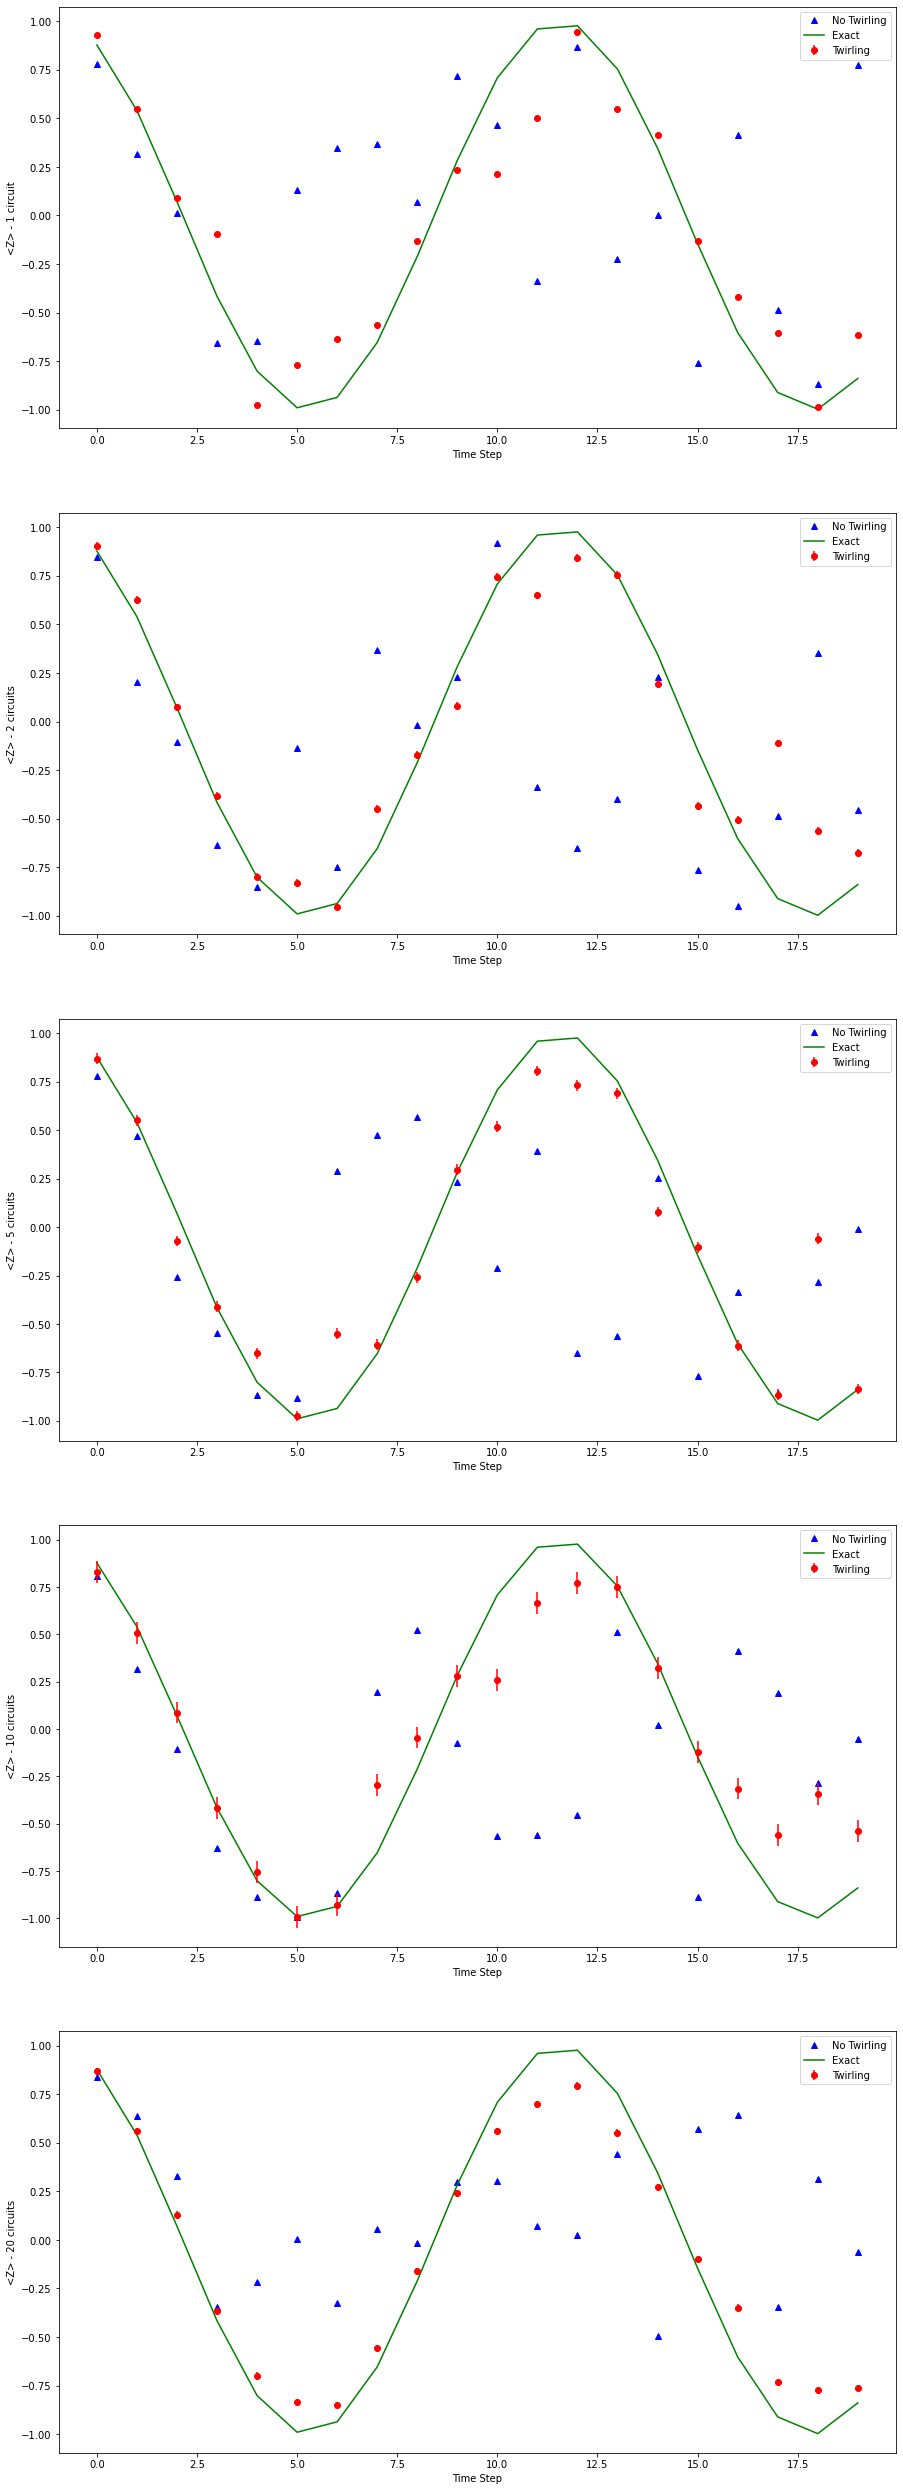

In [71]:
plt.rcParams["figure.figsize"] = [15, 45]
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1)

ax1.plot(a_data1[3], a_data1[1], 'b^', a_data1[3], a_data1[0], 'g-')
ax1.errorbar(a_data1[3], a_data1[2], fmt='ro', yerr=a_data1[4]) 
ax1.set_xlabel('Time Step')
ax1.set_ylabel('<Z> - 1 circuit')
ax1.legend(['No Twirling', 'Exact', 'Twirling'], loc='best')
#ax1.title('1 Pauli Twirled Circuits per Time Step')

ax2.plot(a_data2[3], a_data2[1], 'b^', a_data2[3], a_data2[0], 'g-')
ax2.errorbar(a_data2[3], a_data2[2], fmt='ro', yerr=a_data2[4])
ax2.set_xlabel('Time Step')
ax2.set_ylabel('<Z> - 2 circuits')
ax2.legend(['No Twirling', 'Exact', 'Twirling'], loc='best')

ax3.plot(a_data5[3], a_data5[1], 'b^', a_data5[3], a_data5[0], 'g-')
ax3.errorbar(a_data5[3], a_data5[2], fmt='ro', yerr=a_data5[4])
ax3.set_xlabel('Time Step')
ax3.set_ylabel('<Z> - 5 circuits')
ax3.legend(['No Twirling', 'Exact', 'Twirling'], loc='best')

ax4.plot(a_data10[3], a_data10[1], 'b^', a_data10[3], a_data10[0], 'g-')
ax4.errorbar(a_data10[3], a_data10[2], fmt='ro', yerr=a_data10[4])
ax4.set_xlabel('Time Step')
ax4.set_ylabel('<Z> - 10 circuits')
ax4.legend(['No Twirling', 'Exact', 'Twirling'], loc='best')

ax5.plot(a_data20[3], a_data20[1], 'b^', a_data20[3], a_data20[0], 'g-')
ax5.errorbar(a_data20[3], a_data20[2], fmt='ro', yerr=a_data20[4])
ax5.set_xlabel('Time Step')
ax5.set_ylabel('<Z> - 20 circuits')
ax5.legend(['No Twirling', 'Exact', 'Twirling'], loc='best')

#plt.savefig('(0.02-0.2)random xi trotter steps 6.png')
plt.show()